# CAX Mortgage by CrowdANALYTIX: Yury Fedotov's solution
## The first overview of the data
Before reading this notebook for the first time, I strongly recommend you to read Readme in the core directory. It gives concise introduction to the objectives of this code, to the datasets used, and also my takeaways from participating in this ML competition.

In [42]:
# Import packages
import pandas as pd
import numpy as np
from IPython.display import display

# Additional graphics settings and pre-definition of a usual splitline
%config InlineBackend.figure_format = 'retina' # Very useful for macOS! Turns on HD charts from matplotlib
splitline = '-' * 100 # I'll use this to visually split tables and charts in the output

# Load train and test original data
train_raw = pd.read_csv('/Users/urij/Desktop/CS/CAXMortgage/CAX_MortgageModeling_Train.csv')
test_raw = pd.read_csv('/Users/urij/Desktop/CS/CAXMortgage/CAX_MortgageModeling_Test.csv')

# Briefly explore the features of original data
print('Train data sample:')
display(train_raw.sample(5))
print(splitline)
print('Test data sample:')
display(test_raw.sample(5))
print(splitline)
print('Train data info:')
print(train_raw.info())
print(splitline)
print('Test data info:')
print(test_raw.info())

Train data sample:


,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
23354,CAX_Train_23355,23355,411000,1770,27.69,80.00,39.57,360,328792.0,4.00,...,Single Detached,12,L7A,35-39,Female,240000,5,61,680,FUNDED
10418,CAX_Train_10419,10419,600000,3512,29.30,67.57,29.30,360,625000.0,4.50,...,Single Detached,24,L7B,55-59,Female,120000,8,56,672,FUNDED
11113,CAX_Train_11114,11114,510000,2038,7.44,70.00,54.74,360,325000.0,5.50,...,Single Detached,12,L9V,30-34,Male,164000,8,44-45,676,FUNDED
15178,CAX_Train_15179,15179,215000,1014,10.28,75.00,19.26,360,161250.0,4.25,...,Single Detached,12,L8M,25-29,Male,130000,3,53,644,FUNDED
2912,CAX_Train_2913,2913,415000,857,26.44,80.00,41.17,360,332000.0,4.00,...,Semi-Detached,12,T3P,30-34,Female,83000,2,56,644,FUNDED


----------------------------------------------------------------------------------------------------
Test data sample:


,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
13169,CAX_Test_13170,58812,390000,833,25.54,78.460,36.70,360,306000.0,4.00,...,Single Detached,12,L3Z,60-64,Female,42000,2,56,648,NaN
8093,CAX_Test_8094,53736,1100000,4858,36.14,80.000,36.60,360,879992.0,3.50,...,Single Detached,12,L4G,30-34,Male,120000,8,44-45,766,NaN
13167,CAX_Test_13168,58810,420000,1222,44.60,55.952,52.07,300,245000.0,4.00,...,Townhouse Freehold,60,K2J,40-44,Female,44000,1,81,791,NaN
1971,CAX_Test_1972,47614,1360000,6364,16.14,75.000,42.54,360,1019925.0,5.00,...,Single Detached,12,L5G,40-44,Unknown,1500000,8,56,722,NaN
2855,CAX_Test_2856,48498,300000,1423,37.62,80.000,37.92,360,239992.0,4.25,...,High Rise,12,M9A,45-49,Male,54000,8,48-49,692,NaN


----------------------------------------------------------------------------------------------------
Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
Unique_ID            45642 non-null object
MORTGAGE NUMBER      45642 non-null int64
PROPERTY VALUE       45642 non-null int64
MORTGAGE PAYMENT     45642 non-null int64
GDS                  45642 non-null float64
LTV                  45642 non-null float64
TDS                  45642 non-null float64
AMORTIZATION         45642 non-null int64
MORTGAGE AMOUNT      45642 non-null float64
RATE                 45642 non-null float64
MORTGAGE PURPOSE     45642 non-null object
PAYMENT FREQUENCY    45642 non-null object
PROPERTY TYPE        45642 non-null object
TERM                 45642 non-null int64
FSA                  45642 non-null object
AGE RANGE            45642 non-null object
GENDER               45642 non-null object
INCOME               45642 non-null int64


## In-depth study of features and preprocessing

### Unique ID and Mortgage number
* Unique ID here is just a sequence number of an observation in a dataset. It is not needed for any ML methods;
* We won't need Mortgage number at any step as well, because it's just application's number in bank's internal CRM system.

### Property value (in USD)
I always begin working with a feature with an EDA – exploratory data analysis. Here I check how this feature is distibuted in both train and test sets:

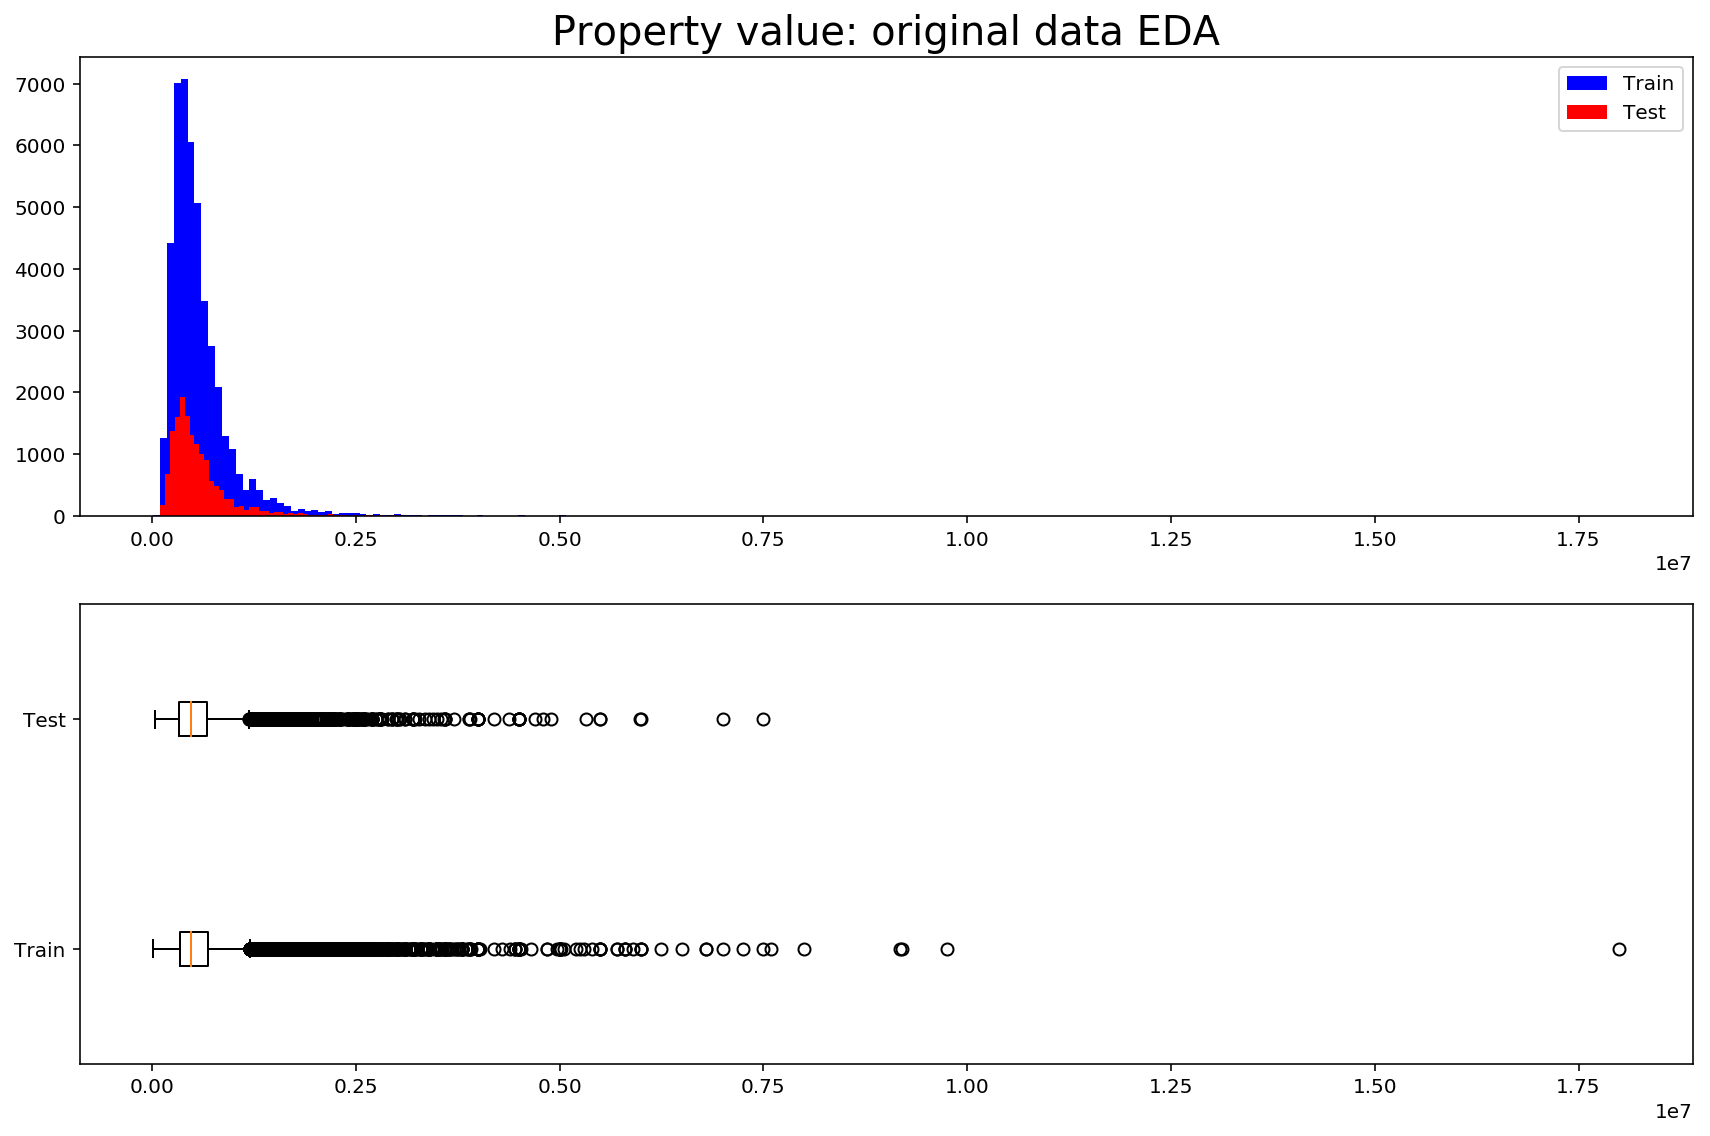

----------------------------------------------------------------------------------------------------
Property value in the train set:


count       45642.0
mean       582611.0
std        438208.2
min         14000.0
25%        340000.0
50%        477000.0
75%        685000.0
max      18000000.0
Name: PROPERTY VALUE, dtype: object

----------------------------------------------------------------------------------------------------
Property value in the test set:


count      15214.0
mean      579044.2
std       417527.7
min        36000.0
25%       337000.0
50%       474000.0
75%       680000.0
max      7500000.0
Name: PROPERTY VALUE, dtype: object

In [43]:
# Import the package for visuals
import matplotlib.pyplot as plt

# Calculate the number of bins for each histogram
nbins_train = int(np.sqrt(train_raw.shape[0]))
nbins_test = int(np.sqrt(test_raw.shape[0]))

# Create a figure to host 2 axes
fig1 = plt.figure(figsize = (12, 8))

# First axes - histograms
axes11 = fig1.add_subplot(211)
axes11.set_title('Property value: original data EDA', fontsize = 20)
axes11.hist(train_raw['PROPERTY VALUE'], bins = nbins_train, color = 'blue', label = 'Train')
axes11.hist(test_raw['PROPERTY VALUE'], bins = nbins_test, color = 'red', label = 'Test')
axes11.legend()

# Second axes - boxplots
axes12 = fig1.add_subplot(212)
axes12.boxplot([train_raw['PROPERTY VALUE'], test_raw['PROPERTY VALUE']], vert = False, labels = ['Train', 'Test'])

# Show the figure
plt.tight_layout()
plt.show()

# Print the five-number summary of the feature
print(splitline)
print('Property value in the train set:')
display(train_raw['PROPERTY VALUE'].describe().apply("{0:.1f}".format))
print(splitline)
print('Property value in the test set:')
display(test_raw['PROPERTY VALUE'].describe().apply("{0:.1f}".format))

**What I see here:**
* The distribution of property value in both sets is approximately the same
* There are few large outliers in the Train set
* Property value feature has a very wide range: from USD 14k to ~750k, even if I remove the largest outliers

**So, I preprocessed this feature as follows:**
* Removed the rows with the most extreme outliers from the train set: those with property value more than the largest property value in the train set
* Transfromed property value feature to the LOG form in both train and test sets

Rows to be dropped from train set based on property value: 6


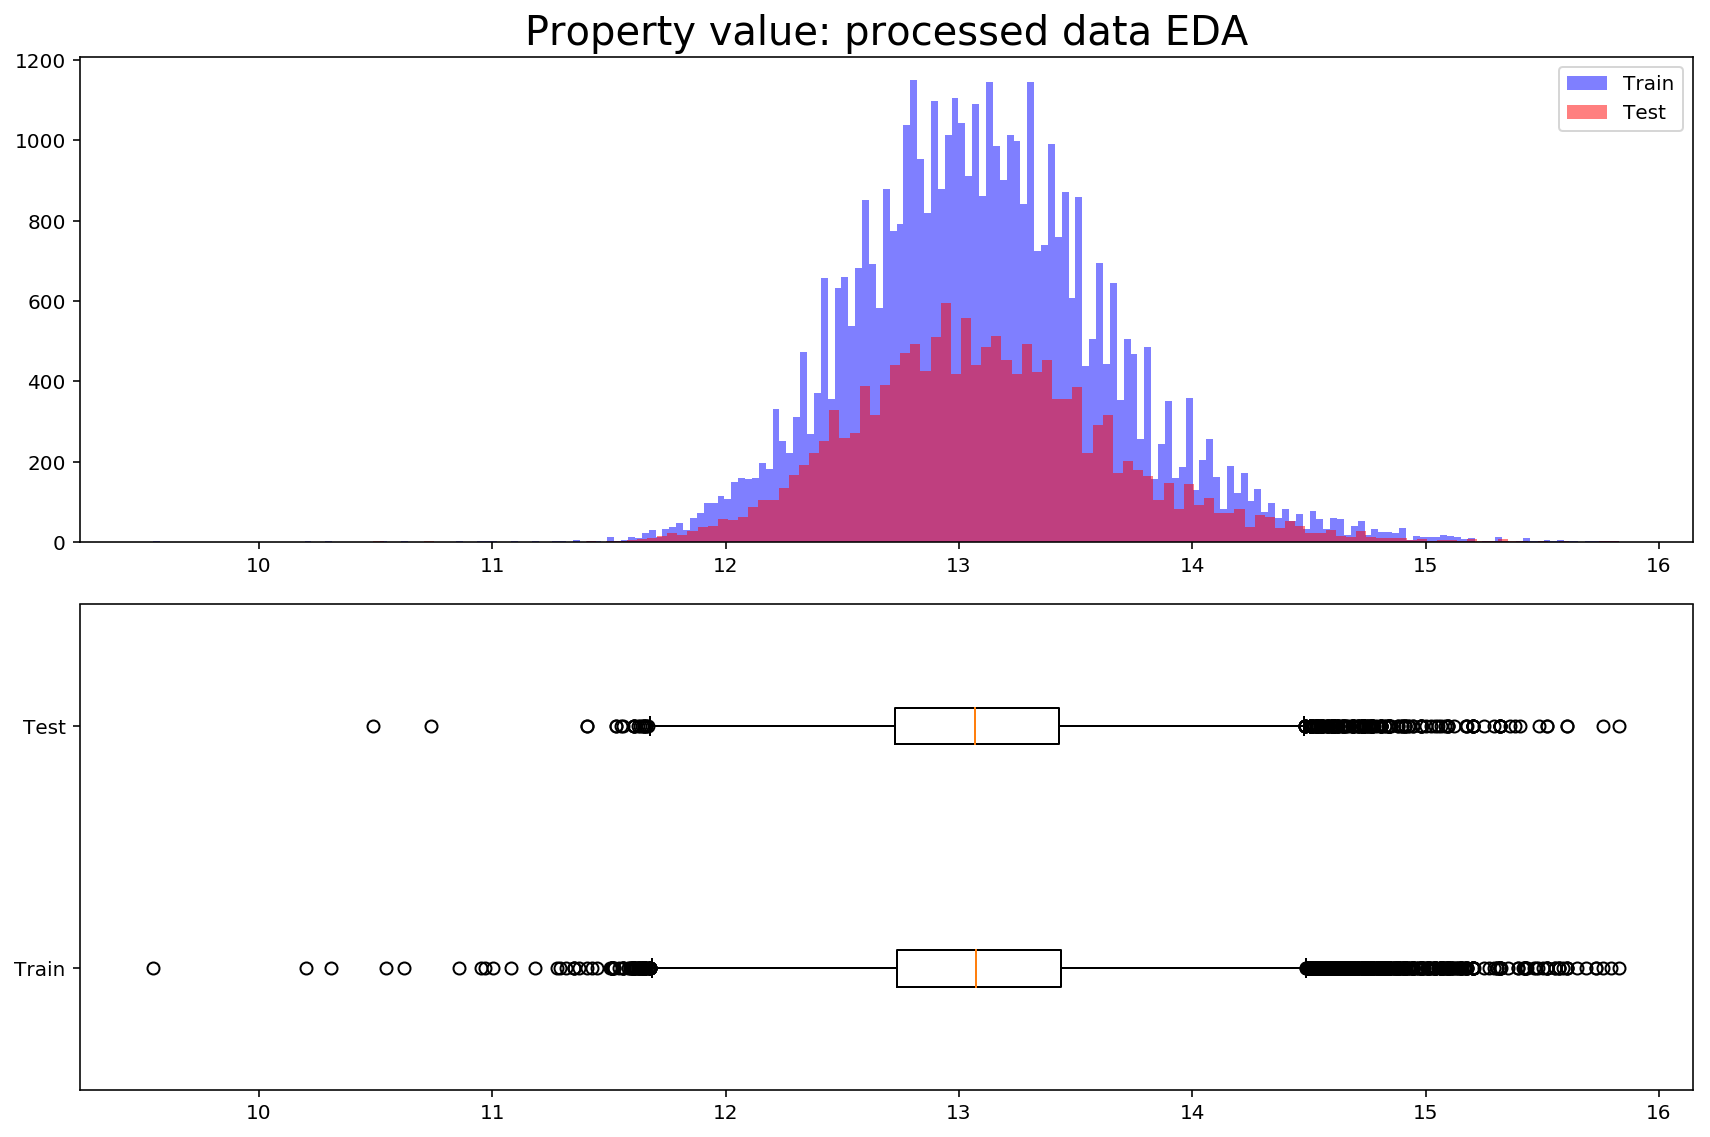

In [44]:
# Find the largest property value in the test set
dropbound_pv = test_raw['PROPERTY VALUE'].max()

# Check how many rows will be dropped from the train set
print('Rows to be dropped from train set based on property value:', \
      train_raw[train_raw['PROPERTY VALUE'] > dropbound_pv].count()['PROPERTY VALUE'])

# Drop them
train_raw = train_raw.drop(train_raw[train_raw['PROPERTY VALUE'] > dropbound_pv].index)

# Convert property value to LOG form in both sets
for dataset in [train_raw, test_raw]:
    dataset['PROPERTY VALUE'] = np.log(dataset['PROPERTY VALUE'])
    
# Create a chart to check the preprocessing results
fig2 = plt.figure(figsize = (12, 8))
axes21 = fig2.add_subplot(211)
axes21.hist(train_raw['PROPERTY VALUE'], bins = nbins_train, color = 'blue', label = 'Train', alpha = 0.5)
axes21.hist(test_raw['PROPERTY VALUE'], bins = nbins_test, color = 'red', label = 'Test', alpha = 0.5)
axes21.set_title('Property value: processed data EDA', fontsize = 20)
axes21.legend()
axes22 = fig2.add_subplot(212)
axes22.boxplot([train_raw['PROPERTY VALUE'], test_raw['PROPERTY VALUE']], vert = False, labels = ['Train', 'Test'])
plt.tight_layout()
plt.show()

Now I test a hypothesis regarding the relationship between property value feature and target variable.
**My hypothesis is**: Property value has positive correlation with funding rate (Here and onwards, I'll call the probability of a morgage being funded by a keyword: 'Funding rate').

In [45]:
# First, I encode target to binary variable from text format
train_raw['RESULT'] = train_raw['RESULT'].map({'FUNDED': 1, 'NOT FUNDED': 0})

# Second, I calculate the point-biserial correlation coefficient
from scipy import stats
pbis = stats.pointbiserialr(train_raw['RESULT'], train_raw['PROPERTY VALUE'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: -0.0866
P-value: 0.0


My hypothesis should be **rejected**, and at 1% significance level we can conclude that **property value has negative correlation with funding rate**. Undoubtedly, a more reliable conclusion can be made only by evaluating the coefficient before the property value feature in the final model with several factors. However, such a quick check allowed me to make a decision to **include this feature in the final model**.

### Mortgage payment (in USD per single payment) and Payment frequency (as text)
To properly use these features, I decided to begin with figuring the dimensionality of mortgage payment. It was said in the competition documentation that this feature contains payments values based on "... and payment frequency". So I expected to see per-payment values there: the more frequent the terms, the lower the single payment. And it was true. I made a quick check and ensured that for observations with equal interest rate, the product of mortgage payment and the number of mortgage payments per year is equal.

As I did with property value, I explore the distribution of these features first. But this time i'll do in via crosstab, because Payment frequency has only 6 values:

In [46]:
display(pd.crosstab(train_raw['PAYMENT FREQUENCY'], train_raw['RESULT']))

RESULT,0,1
PAYMENT FREQUENCY,,
Bi-Weekly,0,1803
Bi-Weekly Accelerated,0,1047
Monthly,9618,33161
Semi-Monthly,0,4
Weekly,0,2
Weekly Accelerated,0,1


Here I see that all the applications for non-monthly payments were funded. So, my decision was the following:
* Convert all payments to monthly values and create a new feature of of it: MPAYMENT
* Encode "Payment frequency" feature to binary: whether it is monthly or not

In [47]:
# Present payment frequency as the number of payments per month (PPM)
for dataset in [train_raw, test_raw]:
    dataset['PPM'] = dataset['PAYMENT FREQUENCY'].map({'Monthly': 1,
                                                       'Bi-Weekly': 2,
                                                       'Bi-Weekly Accelerated': 2,
                                                       'Semi-Monthly': 2,
                                                       'Weekly': 4,
                                                       'Weekly Accelerated': 4})
    
    # Create a new feature: monthly payment value
    dataset['MPAYMENT'] = dataset['PPM'] * dataset['MORTGAGE PAYMENT']
    
# Encode payment frequency to binary - monthly or not
for dataset in [train_raw, test_raw]:
    dataset['PAYMENT FREQUENCY'] = dataset['PAYMENT FREQUENCY'].map({'Monthly': 1,
                                                                     'Bi-Weekly': 0,
                                                                     'Bi-Weekly Accelerated': 0,
                                                                     'Semi-Monthly': 0,
                                                                     'Weekly': 0,
                                                                     'Weekly Accelerated': 0})

Decision: **include** MPAYMENT and the binary Payment Frequency to the final model.

### GDS: Annualized Housing Expenses / Annual Income * 100
The first obvious hypothesis related to this feature: it is negatively correlated with funding rate. I tried to check it via a table first, without statistical tests:

In [48]:
# Create a new temporary feature - GDS band. I divided GDS into 5 bans based on quantiles of distribution.
train_raw['GDS_band'] = pd.qcut(train_raw['GDS'], 5)

# Now, let's see how our funding rate differs from band to band
display(train_raw[['GDS_band', 'RESULT']].groupby(['GDS_band'], \
        as_index=False).mean().sort_values(by='GDS_band', ascending=True))

,GDS_band,RESULT
0,"(-37.041, 16.92]",0.794656
1,"(16.92, 26.08]",0.790881
2,"(26.08, 31.88]",0.798423
3,"(31.88, 37.4]",0.800241
4,"(37.4, 6872300.0]",0.762004


I also tried 3 and 7 bands, and neither case provides any sign of correlation. So, I decided **not to include this feature in the further analysis and final model**.

### LTV: Mortgage Amount / Property Value * 100

Same as with GDS, I first checked the potential correlation visually, and my starting hypothesis was that LTV should be negatively correlated with funding rate.

In [49]:
# Create a new temporary feature - LTV band. I divided LTV into 5 bans based on quantiles of distribution.
train_raw['LTV_band'] = pd.qcut(train_raw['LTV'], 5)

# Now, let's see how our funding rate differs from band to band
display(train_raw[['LTV_band', 'RESULT']].groupby(['LTV_band'], \
        as_index=False).count().sort_values(by='LTV_band', ascending=True))

,LTV_band,RESULT
0,"(6.6659999999999995, 65.0]",13622
1,"(65.0, 73.2]",4637
2,"(73.2, 75.0]",10272
3,"(75.0, 80.0]",17080
4,"(80.0, 95.0]",25


Well, seems like there might be a correlation! Interesting, that none application from the highest LTV band was approved (there were 25 of them, the piece of code that checked it is not presented here).

I also decided that the fifth band data can be treated as significant outliers: first four bands have thousands of observations, while the last has only 25. I decided to drop all observations from this band.

In [50]:
# Drop the observations from the last band of LTV
train_raw = train_raw.drop(train_raw[train_raw['LTV_band'] == train_raw['LTV_band'].max()].index)

The next step was to check whether there is a correlation between LTV and funding rate. I'll use the point-biserial correlation coefficient:

In [51]:
# "Calculate the point-biserial correlation coefficient". Stats package is already imported.
pbis = stats.pointbiserialr(train_raw['RESULT'], train_raw['LTV'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: 0.0648
P-value: 0.0


I can accept the hypothesis that there is a positive correlation at 1% significance level. However, when I tried to include many combinations of features into my final model, adding LTV didn't increase model's performance. Overall, **I decided not include LTV variable in my model**.

### TDS: (Annualized Housing Expenses + Other Expenses) / Annual Income * 100
I started exploring this feature via EDA.

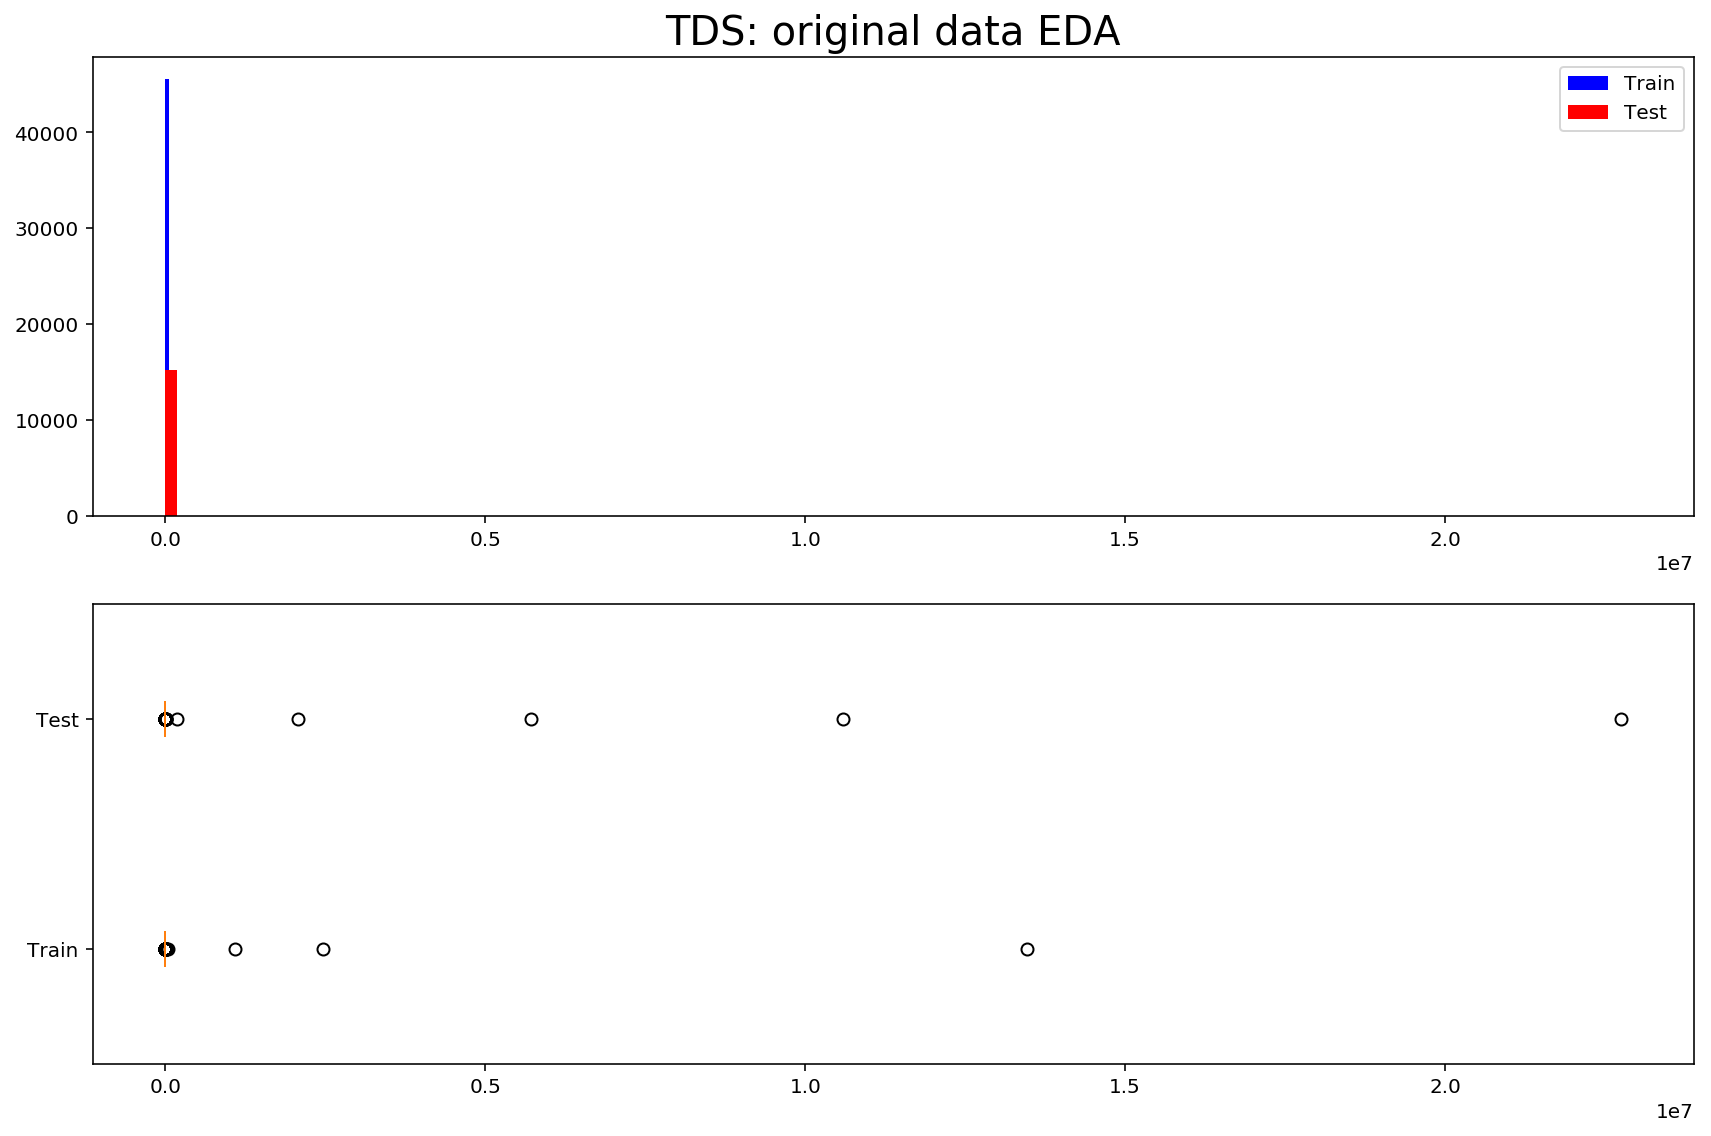

----------------------------------------------------------------------------------------------------
TDS in the train set:


count       45611.0
mean          412.8
std         64280.4
min           -10.7
25%            32.8
50%            38.3
75%            42.2
max      13462562.5
Name: TDS, dtype: object

----------------------------------------------------------------------------------------------------
TDS in the test set:


count       15214.0
mean         2754.3
std        209271.5
min           -42.0
25%            32.9
50%            38.4
75%            42.2
max      22747962.5
Name: TDS, dtype: object

In [52]:
# Create a figure to host 2 axes
fig3 = plt.figure(figsize = (12, 8))

# First axes - histograms
axes31 = fig3.add_subplot(211)
axes31.set_title('TDS: original data EDA', fontsize = 20)
axes31.hist(train_raw['TDS'], bins = nbins_train, color = 'blue', label = 'Train')
axes31.hist(test_raw['TDS'], bins = nbins_test, color = 'red', label = 'Test')
axes31.legend()

# Second axes - boxplots
axes32 = fig3.add_subplot(212)
axes32.boxplot([train_raw['TDS'], test_raw['TDS']], vert = False, labels = ['Train', 'Test'])

# Show the figure
plt.tight_layout()
plt.show()

# Print the five figure summary of the feature
print(splitline)
print('TDS in the train set:')
display(train_raw['TDS'].describe().apply("{0:.1f}".format))
print(splitline)
print('TDS in the test set:')
display(test_raw['TDS'].describe().apply("{0:.1f}".format))

Here I see some huge outliers in both train and test sets. Before testing any hypothesis, let's deal with them. I will keep test set observations as they are now, because these outliers will not affect models' coefficients estimation. However, it's better to remove outliers from the train set. I will now check how many values of TDS exceed 100, and delete respective observations, if there are not so many rows.

What is more, it seems like there are some negative values, which is a mistake: neither expenses nor income, which are the components of this feature, cannot be negative. I replace these negative values in both train and test set by zero.

In [53]:
# Check how many TDS values exceed 100
dropbound_tds = 100
print('To drop:', train_raw[train_raw['TDS'] > dropbound_tds].count()['TDS'])

# Drop these values
train_raw = train_raw.drop(train_raw[train_raw['TDS'] > dropbound_tds].index)

# Replace negative TDS by zero in both sets
for dataset in [train_raw, test_raw]:
    dataset.loc[dataset['TDS'] < 0, 'TDS'] = 0

To drop: 353


Then, I repeat an EDA of the train set:

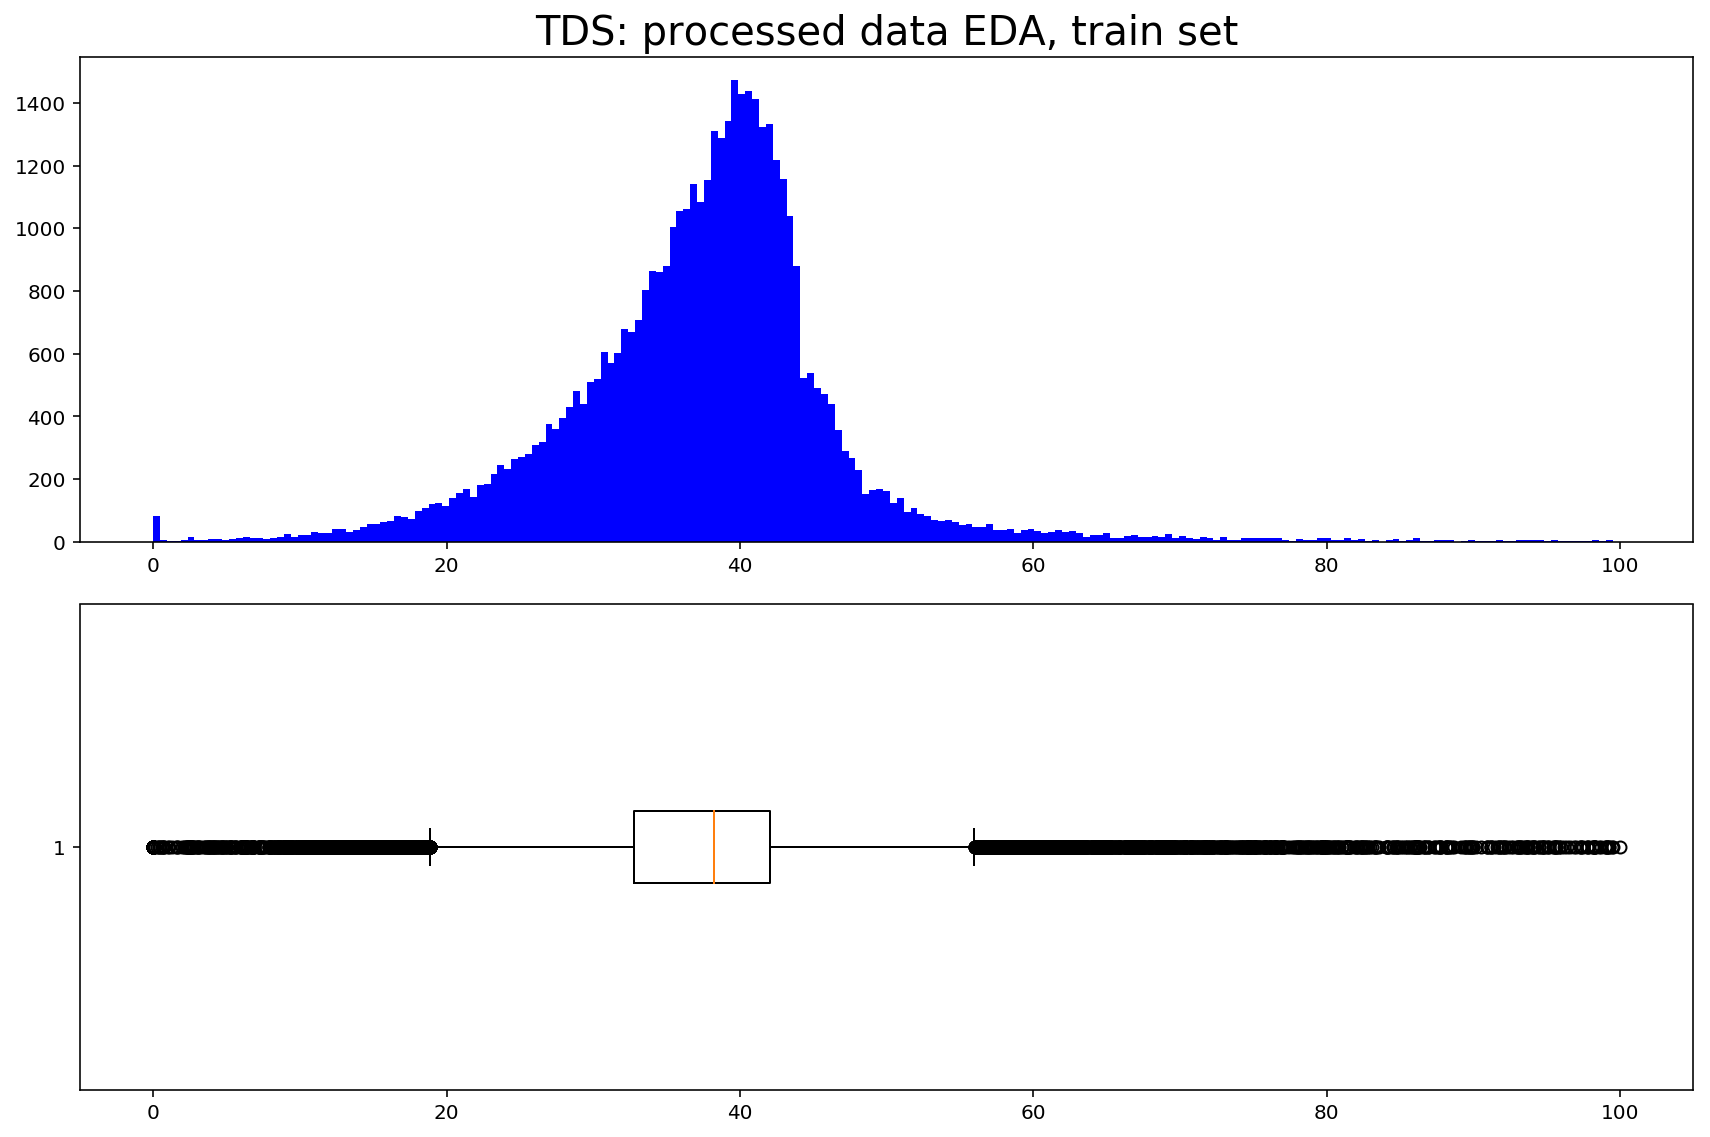

In [54]:
# Create a figure to host 2 axes
fig4 = plt.figure(figsize = (12, 8))

# First axes - histogram
axes41 = fig4.add_subplot(211)
axes41.set_title('TDS: processed data EDA, train set', fontsize = 20)
axes41.hist(train_raw['TDS'], bins = nbins_train, color = 'blue', label = 'Train')

# Second axes - boxplot
axes42 = fig4.add_subplot(212)
axes42.boxplot(train_raw['TDS'], vert = False)

# Show the figure
plt.tight_layout()
plt.show()

Finally, I will test the hypothesis that there is a correlation between TDS and funding rate:

In [55]:
# "Calculate the point-biserial correlation coefficient". Stats package is already imported.
pbis = stats.pointbiserialr(train_raw['RESULT'], train_raw['TDS'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: -0.0381
P-value: 0.0


At 1% significance level I can accept that yes, there is a negative correlation between them. However, when I tried to include many combinations of features into my final model, adding TDS didn't increase model's performance. Overall, **I decided not include TDS variable in my model**.

### Amortization, in month

Let's check which values this feature takes:

In [56]:
train_raw.groupby('AMORTIZATION')['RESULT'].agg(['count','mean'])

,count,mean
AMORTIZATION,,
60,1,1.000000
120,15,0.933333
180,56,0.767857
240,116,0.879310
300,3072,0.756836
360,41986,0.792264
420,11,0.363636
480,1,0.000000


First, I'll convert amortization to yearly values. Second, I'll delete two outlier observations in the train set - the ones with 5 and 40 years of amortization respectively.

In [57]:
# Convert amortization to yearly
for dataset in [train_raw, test_raw]:
    dataset['AMORTIZATION'] = dataset['AMORTIZATION'] / 12

# Delete outliers
train_raw = train_raw.drop(train_raw[train_raw['AMORTIZATION'] == 5].index)
train_raw = train_raw.drop(train_raw[train_raw['AMORTIZATION'] == 40].index)

# Check the data now
train_raw.groupby('AMORTIZATION')['RESULT'].agg(['count','mean'])

,count,mean
AMORTIZATION,,
10.0,15,0.933333
15.0,56,0.767857
20.0,116,0.879310
25.0,3072,0.756836
30.0,41986,0.792264
35.0,11,0.363636


Test for correlation shows that we can accept that there is a positive correlation between amortization and funding rate at 1% significance level, but still, the coefficient estimate is ~ 0.01. This is the first reason why **I decided NOT to include amortization in my final model**, but the other one is that adding it didn't increase models' performance.

In [58]:
# Correlation test: amortization and result
pbis = stats.pointbiserialr(train_raw['AMORTIZATION'], train_raw['RESULT'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: 0.013
P-value: 0.0056


### Mortgage Amount requested, in dollars

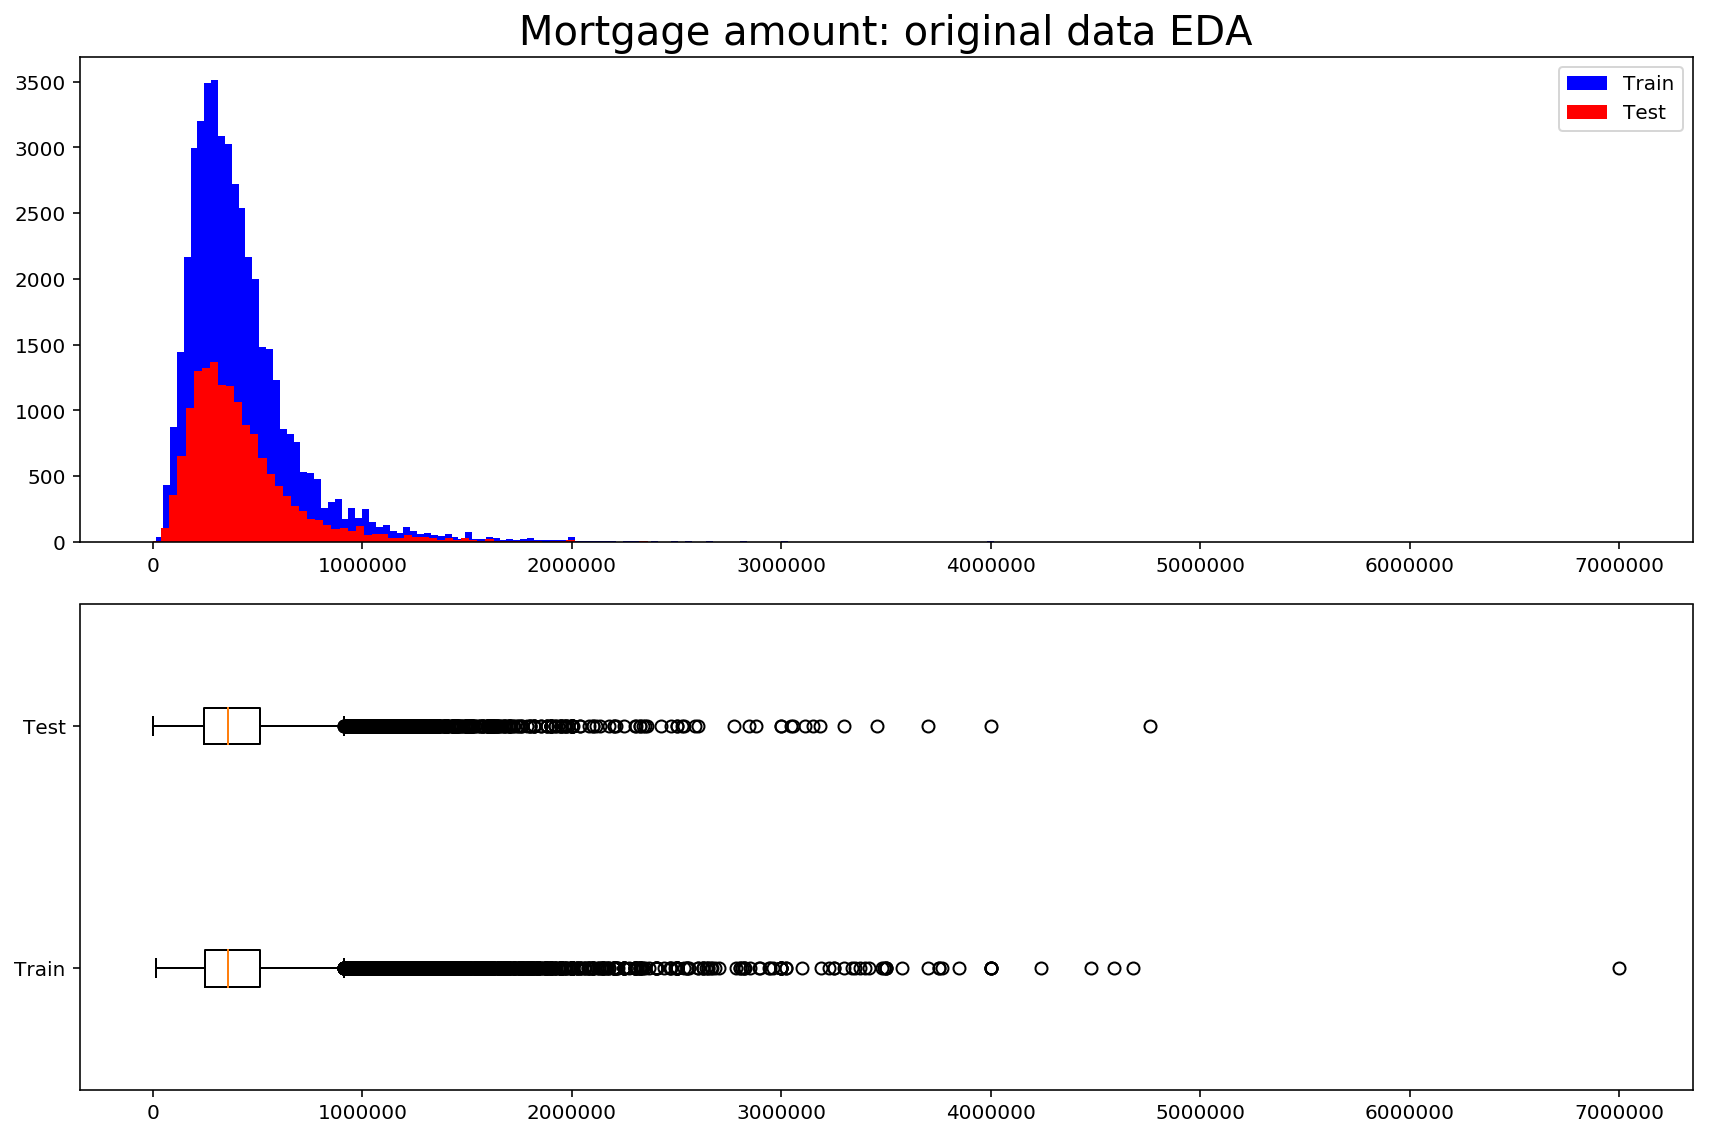

----------------------------------------------------------------------------------------------------
Mortgage amount in the train set:


count      45256.0
mean      424168.3
std       294695.7
min        15000.0
25%       246320.0
50%       357500.0
75%       512000.0
max      7000000.0
Name: MORTGAGE AMOUNT, dtype: object

----------------------------------------------------------------------------------------------------
Mortgage amount in the test set:


count      15214.0
mean      423722.4
std       289890.1
min          333.9
25%       244145.0
50%       356250.0
75%       511185.0
max      4760000.0
Name: MORTGAGE AMOUNT, dtype: object

In [59]:
# Create a figure to host 2 axes
fig5 = plt.figure(figsize = (12, 8))

# First axes - histograms
axes51 = fig5.add_subplot(211)
axes51.set_title('Mortgage amount: original data EDA', fontsize = 20)
axes51.hist(train_raw['MORTGAGE AMOUNT'], bins = nbins_train, color = 'blue', label = 'Train')
axes51.hist(test_raw['MORTGAGE AMOUNT'], bins = nbins_test, color = 'red', label = 'Test')
axes51.legend()

# Second axes - boxplots
axes52 = fig5.add_subplot(212)
axes52.boxplot([train_raw['MORTGAGE AMOUNT'], test_raw['MORTGAGE AMOUNT']], vert = False, labels = ['Train', 'Test'])

# Show the figure
plt.tight_layout()
plt.show()

# Print the five figure summary of the feature
print(splitline)
print('Mortgage amount in the train set:')
display(train_raw['MORTGAGE AMOUNT'].describe().apply("{0:.1f}".format))
print(splitline)
print('Mortgage amount in the test set:')
display(test_raw['MORTGAGE AMOUNT'].describe().apply("{0:.1f}".format))

Preprocessing approach:
1. Remove outliers in the train set: observations where mortgage amount > $4m
1. Transform to LOG form

In [60]:
# Remove outlying rows by mortgage amount
train_raw.drop(train_raw[train_raw['MORTGAGE AMOUNT'] > 4000000].index, inplace = True)

# Convert mortgage amount to LOG form in both sets
for dataset in [train_raw, test_raw]:
    dataset['MORTGAGE AMOUNT'] = np.log(dataset['MORTGAGE AMOUNT'])

Same as with the previous features, while I was trying different combinations of features in my models, adding mortgage amount didn't increase their performance. **I didn't add "morgage amount" feature to my final model**.

### Interest rate requested
Let's check how this feature is distributed:

In [61]:
train_raw.groupby('RATE')['RESULT'].agg(['count','mean'])

,count,mean
RATE,,
2.50,4,0.250000
2.75,3,0.000000
3.00,7,0.000000
3.25,5,0.200000
3.50,1700,0.891765
3.75,1233,0.815896
4.00,7054,0.835838
4.25,6372,0.794727
4.50,7366,0.799213


Looking at this data I clearly see that the wast majority of applications submitted a rate between 3.5 and 6.0 inclusive. I decided to limit the range of this variable by this interval, and make all other values equal to 3.5 or 6.0, depending on whether they are below or above this interval:

In [62]:
# Replace extreme unpopular rates by min and max of popular
for dataset in [train_raw, test_raw]:
    dataset.loc[dataset['RATE'] < 3.5, 'RATE'] = 3.5
    dataset.loc[dataset['RATE'] > 6.0, 'RATE'] = 6.0

**Rate feature was included in my final model.**

### Mortgage Purpose: purchase or refinance

In [63]:
# Quick check of the distribution
train_raw.groupby('MORTGAGE PURPOSE')['RESULT'].agg(['count','mean'])

,count,mean
MORTGAGE PURPOSE,,
Purchase,24242,0.828438
Refinance,21009,0.745633


I see that almost half of mortgages in the data are taken for new accomodation, while the other half is for refinancing old debts. It's also clear that in the latter case, acceptance rate was lower. **For the further use in the model, i encode this feature to binary, and include to the final model**:

In [64]:
# Encode purpose to binary
for dataset in [train_raw, test_raw]:
    dataset['MORTGAGE PURPOSE'] = dataset['MORTGAGE PURPOSE'].map({'Purchase': 1, 'Refinance': 0})
    dataset.rename({'MORTGAGE PURPOSE':'Purchase'}, axis = 1, inplace = True)

### Property Type

In [65]:
# Quick check of the distribution
train_raw.groupby('PROPERTY TYPE')['RESULT'].agg(['count','mean'])

,count,mean
PROPERTY TYPE,,
Duplex,463,0.699784
Fourplex,115,0.600000
High Rise,5831,0.817699
Semi-Detached,4204,0.811132
Single Detached,29131,0.780268
Townhouse Condominium,2294,0.818221
Townhouse Freehold,3020,0.805960
Triplex,193,0.704663


Here, from the first sight, the trend is the following: less common property types have low funding rate. I transformed this feature into binary, indicating whether a given accomodation is of a common type or not:

In [66]:
# Simplify the property type column
common_types = ['Single Detached', 'High Rise', 'Semi-Detached', 'Townhouse Freehold', 'Townhouse Condominium']
rare_types = ['Duplex', 'Triplex', 'Fourplex']

for dataset in [train_raw, test_raw]:
    dataset['PROPERTY TYPE'].replace(common_types, 'Common', inplace = True)
    dataset['PROPERTY TYPE'].replace(rare_types, 'Rare', inplace = True)
    dataset['PROPERTY TYPE'] = dataset['PROPERTY TYPE'].map({'Common': 1, 'Rare': 0})
    dataset.rename({'PROPERTY TYPE':'Common_type'}, axis = 1, inplace = True)
    
# What we get:
train_raw.groupby('Common_type')['RESULT'].agg(['count','mean'])

,count,mean
Common_type,,
0,771,0.686122
1,44480,0.791794


'Common_type' feature, which if a binary transformation of 'Purpose', **was included in the final model**.

### Term of the mortgage requested
I decided **not to include this feature into analysis**, because amortization period is more relevant in affecting the probability of funding.

The difference between amortization and term is decently explained there: https://www.moneysense.ca/spend/real-estate/buying/the-difference-between-mortgage-amortization-and-term/

### FSA – the first three characters of the postal code, designating an area where the property is
I began by checking the number of distinct values of this feature:

In [67]:
print(train_raw.FSA.value_counts())

L7A    898
M5V    671
L6R    657
L6P    614
L6X    544
L4C    513
L4N    505
L6Y    490
L9T    477
L6A    464
M2N    442
L4H    416
L4E    373
L6S    343
M1B    342
L5M    334
L4J    332
L5B    331
L1T    314
L3S    304
L1Z    301
L4G    301
L3Z    299
L5N    289
L6C    287
L1K    280
L3R    272
L1V    271
L6V    263
L3T    262
      ... 
G6Y      1
H4C      1
T9A      1
G3J      1
G3N      1
M1Z      1
P4P      1
G2M      1
J1J      1
N9C      1
J6T      1
E2G      1
C0C      1
J1E      1
C4C      1
N0K      1
J4P      1
R1N      1
N6W      1
G1N      1
V0H      1
J1H      1
R6M      1
V6T      1
T5H      1
T1G      1
R3P      1
J3M      1
V1B      1
V9K      1
Name: FSA, Length: 1139, dtype: int64


It has 1139 distinct values, which are postcodes. Since the time of the competition was limited, I decided not to continue the preprocessing of this feature, and **not to include it in the analysis**.

### Age Range of the main applicant

In [68]:
# Quick check of the distribution
train_raw.groupby('AGE RANGE')['RESULT'].agg(['count','mean'])

,count,mean
AGE RANGE,,
25-29,2520,0.804762
30-34,4526,0.805789
35-39,5797,0.797999
40-44,6838,0.792337
45-49,7602,0.790976
50-54,6742,0.781222
55-59,4659,0.770552
60-64,2764,0.781838
65-69,1637,0.779475


It looks like there is a negative correlation between age and funding rate. I decided to convert this feature from band format to numeric format, and to do so I assume that the age of every applicant is equal to the mean age within his interval:

In [69]:
# Convert age ranges to range means
for dataset in [train_raw, test_raw]:
    dataset['AGE'] = dataset['AGE RANGE'].map({'Under 25': 23,
                                               '25-29': 27,
                                               '30-34': 32,
                                               '35-39': 37,
                                               '40-44': 42,
                                               '45-49': 47,
                                               '50-54': 52,
                                               '55-59': 57,
                                               '60-64': 62,
                                               '65-69': 67,
                                               '70 and over': 72})

**Age or age range inself were not included in the final model**. However, it was used in engineering a new feature which will be introduced later in this workbook.

### Gender

In [70]:
# Quick check of the distribution
train_raw.groupby('GENDER')['RESULT'].agg(['count','mean'])

,count,mean
GENDER,,
Female,14214,0.792810
Male,24688,0.783052
Unknown,6349,0.810679


Looks like we can do nothing with this feature. The funding fate within men and women is almost equal, and around 13% of values in this feature are missing. **Didn't include it in my models**.

### Income, in USD per year

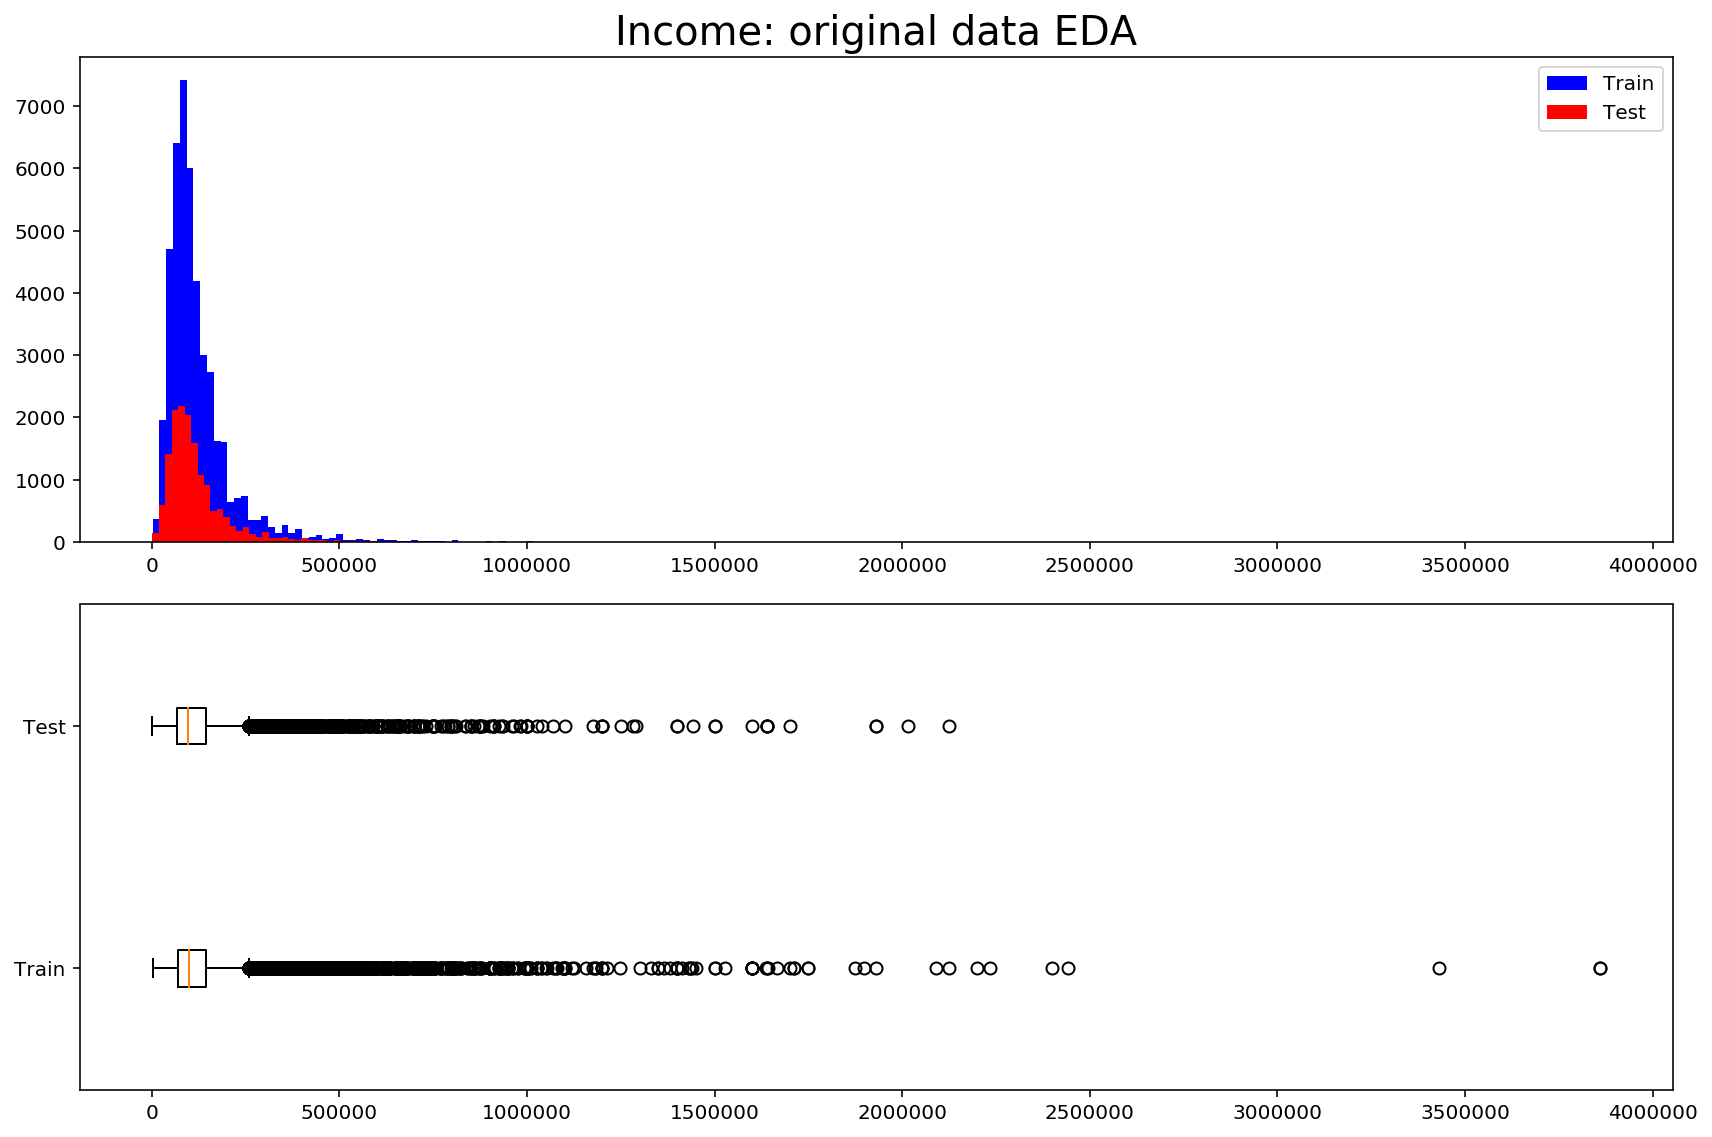

----------------------------------------------------------------------------------------------------
Income in the train set:


count      45251.0
mean      125493.1
std       114001.0
min         2000.0
25%        69000.0
50%        98000.0
75%       145000.0
max      3860000.0
Name: INCOME, dtype: object

----------------------------------------------------------------------------------------------------
Income in the test set:


count      15214.0
mean      124187.4
std       111012.2
min         1000.0
25%        67000.0
50%        97000.0
75%       144000.0
max      2125000.0
Name: INCOME, dtype: object

In [71]:
# Create a figure to host 2 axes
fig6 = plt.figure(figsize = (12, 8))

# First axes - histograms
axes61 = fig6.add_subplot(211)
axes61.set_title('Income: original data EDA', fontsize = 20)
axes61.hist(train_raw['INCOME'], bins = nbins_train, color = 'blue', label = 'Train')
axes61.hist(test_raw['INCOME'], bins = nbins_test, color = 'red', label = 'Test')
axes61.legend()

# Second axes - boxplots
axes62 = fig6.add_subplot(212)
axes62.boxplot([train_raw['INCOME'], test_raw['INCOME']], vert = False, labels = ['Train', 'Test'])

# Show the figure
plt.tight_layout()
plt.show()

# Print the five figure summary of the feature
print(splitline)
print('Income in the train set:')
display(train_raw['INCOME'].describe().apply("{0:.1f}".format))
print(splitline)
print('Income in the test set:')
display(test_raw['INCOME'].describe().apply("{0:.1f}".format))

Preprocessing approach here: remove a few largest outliers and convert to log form

In [72]:
# Check how many income values exceed $2m
dropbound_inc = 2000000
print('To drop:', train_raw[train_raw['INCOME'] > dropbound_inc].count()['INCOME'])

# Drop these values
train_raw = train_raw.drop(train_raw[train_raw['INCOME'] > dropbound_inc].index)

# Convert income to LOG form in both sets
for dataset in [train_raw, test_raw]:
    dataset['INCOME'] = np.log(dataset['INCOME'])

To drop: 9


In the end, **income feature iteslf was not included in the final model**, however, it was used in features engineering.

### Income type
In competiton's documentation it is said that this feature is "Numericalized employment status type for the income". I spent around an hour surfing the web, looking for any information related to such classification, but found nothing. In the train set, this feature represents ±25 categories. **Didn't include it in the models**.

### NAICS code of the job category
This feature is more clear. NAICS table can be found here: https://www.naics.com/business-lists/counts-by-naics-code/#countsByNAICS , and it has a finite list of industries (around 30). I checked its distiribution in the test set and, since there was no category which significantly stood out from others in terms of funding rate, **I decided to concentrate on other features and not to add it to the final model**.

### Credit score
Credit score is a numeric feature, and I splitted it into bands to get quick insights:

In [73]:
# Create a new temporary feature - Creditscore band. I divided Credit score into 5 bans based on quantiles of distribution.
train_raw['Creditscore_band'] = pd.qcut(train_raw['CREDIT SCORE'], 5)

# Quick check of the distribution
train_raw.groupby('Creditscore_band')['RESULT'].agg(['count','mean'])

,count,mean
Creditscore_band,,
"(-0.001, 608.0]",9080,0.772137
"(608.0, 656.0]",9031,0.797032
"(656.0, 698.0]",9162,0.797642
"(698.0, 750.0]",9049,0.804840
"(750.0, 899.0]",8920,0.778251


In [74]:
# Correlation test: credit score and result
pbis = stats.pointbiserialr(train_raw['CREDIT SCORE'], train_raw['RESULT'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: 0.0147
P-value: 0.0018


**I didn't include this feature to the final model** because the correlation coefficient value is extremely low. What is more, it seemed very strange for me that there is a decline in funding rate in last band, even though it is the same size as other bands.

## Adding new features
Looking for a better model performance, **I tried to create many features manually. Only three of them were included in my final model**, and in this section I present how I created them.
### LTI - loan to income
Let's create it and check if it is correlated to the target:

In [75]:
# Create LTI feature
for dataset in [train_raw, test_raw]:
    dataset['LTI'] = dataset['MORTGAGE AMOUNT'] / dataset['INCOME']

# Correlation test: LTI and result
pbis = stats.pointbiserialr(train_raw['LTI'], train_raw['RESULT'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: -0.0451
P-value: 0.0


### PTI - payment to income

In [76]:
# Create PTI feature
for dataset in [train_raw, test_raw]:
    dataset['PTI'] = dataset['MPAYMENT'] / dataset['INCOME']
    
# Correlation test: PTI and result
pbis = stats.pointbiserialr(train_raw['PTI'], train_raw['RESULT'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: -0.0745
P-value: 0.0


### Endage - the age when the mortgage is expected to be repaid

In [77]:
# Create new feature - ENDAGE
for dataset in [train_raw, test_raw]:
    dataset['ENDAGE'] = dataset['AGE'] + dataset['AMORTIZATION']
    
# Correlation test: ENDAGE and result
pbis = stats.pointbiserialr(train_raw['ENDAGE'], train_raw['RESULT'])
print('Corr:', round(pbis[0], 4))
print('P-value:', round(pbis[1], 4))

Corr: -0.0224
P-value: 0.0


Some of these features have lower absolute value of correlation coefficient than those features that were not included in final model. I decided to add these features after trying many combinations of features, however, it surprised me from the statistical perspective. One of the areas which I decided to focus on after this competition was statistics: why features with very small correlation coefficients drive target much better than those with higher correlation?

## Model development
### Last look at our data

In [78]:
# Briefly explore the features of our modified data
print('Train data info:')
display(train_raw.info())
print(splitline)
print('Test data info:')
display(test_raw.info())

Train data info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45242 entries, 0 to 45641
Data columns (total 31 columns):
Unique_ID            45242 non-null object
MORTGAGE NUMBER      45242 non-null int64
PROPERTY VALUE       45242 non-null float64
MORTGAGE PAYMENT     45242 non-null int64
GDS                  45242 non-null float64
LTV                  45242 non-null float64
TDS                  45242 non-null float64
AMORTIZATION         45242 non-null float64
MORTGAGE AMOUNT      45242 non-null float64
RATE                 45242 non-null float64
Purchase             45242 non-null int64
PAYMENT FREQUENCY    45242 non-null int64
Common_type          45242 non-null int64
TERM                 45242 non-null int64
FSA                  45242 non-null object
AGE RANGE            45242 non-null object
GENDER               45242 non-null object
INCOME               45242 non-null float64
INCOME TYPE          45242 non-null int64
NAICS CODE           45242 non-null object
CREDIT SCORE 

None

----------------------------------------------------------------------------------------------------
Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15214 entries, 0 to 15213
Data columns (total 28 columns):
Unique_ID            15214 non-null object
MORTGAGE NUMBER      15214 non-null int64
PROPERTY VALUE       15214 non-null float64
MORTGAGE PAYMENT     15214 non-null int64
GDS                  15214 non-null float64
LTV                  15214 non-null float64
TDS                  15214 non-null float64
AMORTIZATION         15214 non-null float64
MORTGAGE AMOUNT      15214 non-null float64
RATE                 15214 non-null float64
Purchase             15214 non-null int64
PAYMENT FREQUENCY    15214 non-null int64
Common_type          15214 non-null int64
TERM                 15214 non-null int64
FSA                  15214 non-null object
AGE RANGE            15214 non-null object
GENDER               15214 non-null object
INCOME               15214 non-null float6

None

### Choice of features for the final model

In [79]:
# Select similar features in train and test set, and split target and features in train set
X = train_raw[['RATE', 'Purchase', 'LTI', 'Common_type', 'PROPERTY VALUE', \
                'MPAYMENT', 'PAYMENT FREQUENCY', 'PTI', 'ENDAGE']].copy()
X_test = test_raw[['RATE', 'Purchase', 'LTI', 'Common_type', 'PROPERTY VALUE', \
                    'MPAYMENT', 'PAYMENT FREQUENCY', 'PTI', 'ENDAGE']].copy()
y = train_raw['RESULT'].copy()

### Model 1: Logistic regression
Most ML models have **hyperparameters** – parameters that should be specified before fitting the model. The process of choosing optimal hyperparameters is called **hyperparameters tuning**, and that's exactly what I do here.

Let me introduce another concept – **regularization**. Regularization is the process of making a model more able to catch general trends instead of train-specific. 'C' hyperparameter in logistic regression is responsible for it. Low C-values lead to lower train score and higher test score, because the model becomes able to catch general trends better. However, excessively low c-values will make a model not able to catch any trends at all.

In the following cell I tune logistic regression's key hyperparameter, c-value, and predict the target variable values for the test set based on the optimal model.

Also, before running it, I'd like to specify that in this competition the **assessment criterion is f1_macro**.
The **F1** score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

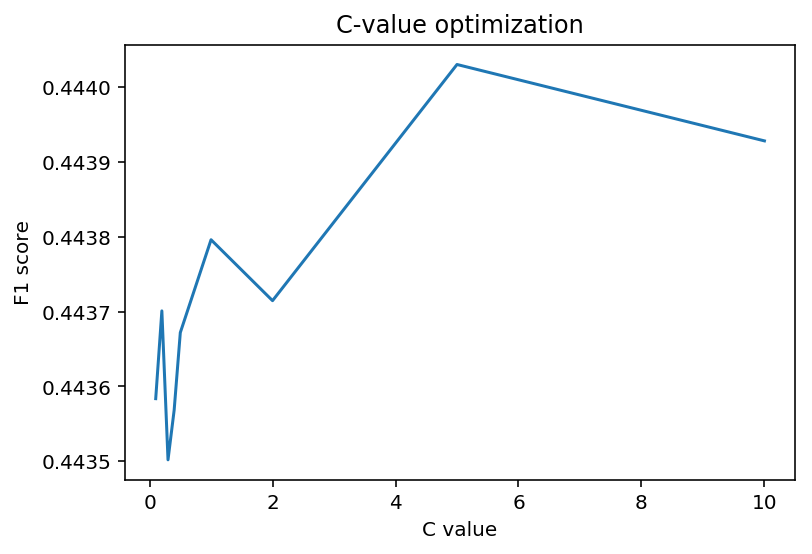

Optimal c-value:  5
Average f1_macro for logistic regression:  0.44


In [80]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define an empty list to store f1scores for different hyperparameters
f1scores = list()

# Values of C to be checked
C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10]

# Loop over C values to find an optimal
for C_value in C_values:
    
    # Create LogisticRegression object
    logreg_foropt = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = C_value, max_iter=1000)
    
    # Fit it to the cross validator
    cv_results_list_logreg = cross_val_score(logreg_foropt, X, y, cv = 5, scoring = 'f1_macro')
    
    # Compute the mean f1_macro score
    avgf1 = np.mean(cv_results_list_logreg)
    
    # Append this mean to the list of f1 scores
    f1scores.append(avgf1)
    
# Plot the results
plt.plot(C_values, f1scores)
plt.title('C-value optimization')
plt.ylabel('F1 score')
plt.xlabel('C value')
plt.show()

# Print the value of C-hyperparameter which was found optimal
optimalC = C_values[f1scores.index(max(f1scores))]
print('Optimal c-value: ', optimalC)

# Create logistic regression with our optimal hyperparameter
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = optimalC, max_iter=1000)

# Calculate its cross validation score
cv_logreg = cross_val_score(logreg, X, y, cv = 5, scoring = 'f1_macro')
avgf1_logreg = np.mean(cv_logreg)
print('Average f1_macro for logistic regression: ', round(avgf1_logreg, 2))

# Fit the model to our train data
logreg.fit(X, y)

# Predict target variable values for the test set
y_pred_logreg = logreg.predict(X_test)

### Model 2: Decision Tree Classifier
In this classificator I'll tune 2 hyperparameters: criterion and max_depth of the tree. The instrument for tuning more that 1 hyperparameter is called **Grid Search**, and I apply it here:

In [81]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a standard classifier
dt_foropt = DecisionTreeClassifier()

# Import GridSearchCV package
from sklearn.model_selection import GridSearchCV

# Instantiate the GridSearchCV object and run the search
parameters_dt = {'criterion':['gini', 'entropy'],
                 'max_depth': np.arange(10,110,10)}

searcher_dt = GridSearchCV(dt_foropt, parameters_dt, cv = 5, scoring = 'f1_macro')
searcher_dt.fit(X, y)

# Report the best parameters and the corresponding score
print("Best CV params", searcher_dt.best_params_)

# Initialize a classifier with optimal parameters
dt = DecisionTreeClassifier(criterion = searcher_dt.best_params_['criterion'],
                            max_depth = searcher_dt.best_params_['max_depth'],
                            class_weight = 'balanced')

# Evaluate it by f1_macro
cv_dt = cross_val_score(dt, X, y, cv = 5, scoring = 'f1_macro')
avgf1_dt = np.mean(cv_dt)
print('Average f1_macro for decision tree: ', round(avgf1_dt, 2))

# Fit the model to our train data
dt.fit(X, y)

# Predict target variable values for the test set
y_pred_dt = dt.predict(X_test)

Best CV params {'criterion': 'gini', 'max_depth': 30}
Average f1_macro for decision tree:  0.53


### Model 3: Support Vector Classifier
SVC also has many hyperparameters, but the grid search in this model turned out to be very time-consuming in CPU-based calculations. Unfortunately, I didn't have time to set up cloud computations when I was participating in this competition, so I fitter a SVC with standard hyperparameters.

In [82]:
# Import SVC from scikit learn
from sklearn.svm import SVC

# Initialize a classifier with gamma = 1
svc = SVC(gamma = 1)

# Evaluate it by f1_macro
cv_svc = cross_val_score(svc, X, y, cv = 5, scoring = 'f1_macro')
avgf1_svc = np.mean(cv_svc)
print('Average f1_macro for support vector machines: ', round(avgf1_svc, 2))

# Fit the model to our train data
svc.fit(X, y)

# Predict target variable values for the test set
y_pred_svc = svc.predict(X_test)

Average f1_macro for support vector machines:  0.45


# Preparing the final submission
Based on f1_macro criterion, DecisionTreeClassifier was the best model among three. Its score was 0.08 higher than that of two other models, which can be considered as significant outperformance.
I will use only the DecisionTreeClassifier's result for the final submission, without any ensembling. The reason for that is that if I use VotingClassifier, for example, and include the most frequent forecast of the target among three models, two bad (_bad_ from the perspective of f1_score, in this specific case only) models will neutralize the DecisionTreeClassifier's predictions.

In [83]:
# Import the submission format sample provided by organizators
example = pd.read_csv('/Users/urij/Desktop/CS/CAXMortgage/CAX_MortgageModeling_SubmissionFormat.csv')

# Create a dataframe with submission's data
submission = pd.DataFrame({
             "Unique_ID": example["Unique_ID"],
             "Result_Predicted": y_pred_dt
             })

# Map the target feature back: from binary to categorical
submission['Result_Predicted'] = submission['Result_Predicted'].map({1: 'FUNDED', 0: 'NOT FUNDED'})

# Export the resulting dataframe as .csv
submission.to_csv('/Users/urij/Desktop/CS/CAXMortgage/YF_v22_dt_1405.csv', index = False)

That's all! Please, refer to Readme to see my conclusion regarding participating in this competition!